In [1]:
import gymnasium as gym
from scripts.DQN_Optimizer import DQN_Optimizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
env = gym.make("MountainCarContinuous-v0")

In [5]:
###########################
## Hyperparameters to tune
###########################

param_dict = {
            "batch_size" : 50,
            "gamma" : 0.99,
            "eps_start" : 0.99,
            "eps_end" : 0.1,
            "eps_decay" : 0.95,
            "learning_rate" : 1e-3,
            "train_episodes" : 200,
            "test_episodes" : 20,
            "steps_between_updates": 50,
            "replay_memory_size" : 10000,
            "optimizer" : "adam",
            "fill_rp_memory" : True,
            "is_continuous" : True,
            "nb_disc_steps" : 5,
            }

In [4]:
## Setting to do hyperparameter search on multiple seeds

hyperparam_to_search = "fill_rp_memory"
params_list = None
seed_list = [42]

nb_params = len(params_list) if params_list is not None else 1 
nb_seeds = len(seed_list)

optim_seeds = np.tile(seed_list,nb_params)
optim_params = np.repeat(params_list,nb_seeds)
    

In [5]:
seed_rewards = []
all_episode_rewards = []
all_epsilons = []
for iteration in range(len(optim_seeds)):
    print("======== running DQN optimization ==========")
    if params_list is not None:
        print("seed: {}. {} : {}".format(optim_seeds[iteration],hyperparam_to_search,optim_params[iteration]))
        param_dict[hyperparam_to_search] = optim_params[iteration]
    dqn_opt = DQN_Optimizer(env = env, seed = int(optim_seeds[iteration]), param_dict=param_dict)
    seed_rewards.append(dqn_opt.run_optimization())
    all_episode_rewards.append(dqn_opt.episode_cumulative_reward)
    all_epsilons.append(dqn_opt.epsilons)

======== running DQN optimization ==========
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 10000


Current train episode eps : 0.37: 100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


Optimization complete
======== running DQN optimization ==========
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 10000


Current train episode eps : 0.37: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]


Optimization complete
======== running DQN optimization ==========
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 10000


Current train episode eps : 0.37: 100%|██████████| 20/20 [00:05<00:00,  3.49it/s]

Optimization complete


In [6]:
def plot_test_rewards(seed_rewards, optim_params,param_name , individual = False, additionnal_info = ""):

    test_rewards = []
    test_episodes = []
    seeds = []
    params = []

    for iteration, rewards in enumerate(seed_rewards):
        for episode_idx, reward in enumerate(rewards):
            test_rewards.append(reward)
            test_episodes.append(episode_idx*10)
            seeds.append(iteration)
            params.append(optim_params[iteration])

    df = pd.DataFrame({
        'Episode': test_episodes,
        'Test_rewards': test_rewards,
        'Seed': seeds,
        param_name: params
    })
    df_name = "results/Test_rewards" + "_varying_" + param_name + additionnal_info + ".csv"
    df.to_csv(df_name)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    if individual:
        sns.lineplot(data=df, x='Episode', y='Test_rewards', hue = param_name, legend="full", palette = sns.color_palette("hls", 8))
    else:
        sns.lineplot(data=df, x='Episode', y='Test_rewards')
        
    plt.title('Test rewards with varying {}'.format(param_name))
    plt.xlabel('Episode')
    plt.ylabel('Test rewards')
    plt.savefig('results/Test_rewards_with_varying_{}.png'.format(param_name))
    plt.show()


def plot_train_rewards(seed_rewards, optim_params,param_name , individual = False, additionnal_info = ""):

    test_rewards = []
    test_episodes = []
    seeds = []
    params = []

    for iteration, rewards in enumerate(seed_rewards):
        for episode_idx, reward in enumerate(rewards):
            test_rewards.append(reward)
            test_episodes.append(episode_idx)
            seeds.append(iteration)
            params.append(optim_params[iteration])

    df = pd.DataFrame({
        'Episode': test_episodes,
        'Train_rewards': test_rewards,
        'Seed': seeds,
        param_name: params
    })
    df_name = "results/Train_rewards" + "_varying_" + param_name + additionnal_info + ".csv"
    df.to_csv(df_name)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    if individual:
        sns.lineplot(data=df, x='Episode', y='Train_rewards', hue = param_name, legend="full", palette = sns.color_palette("hls", 8))
    else:
        sns.lineplot(data=df, x='Episode', y='Train_rewards')
        
    plt.title('Train rewards with varying {}'.format(param_name))
    plt.xlabel('Episode')
    plt.ylabel('Train rewards')
    plt.savefig('results/Train_rewards_with_varying_{}.png'.format(param_name))
    plt.show()

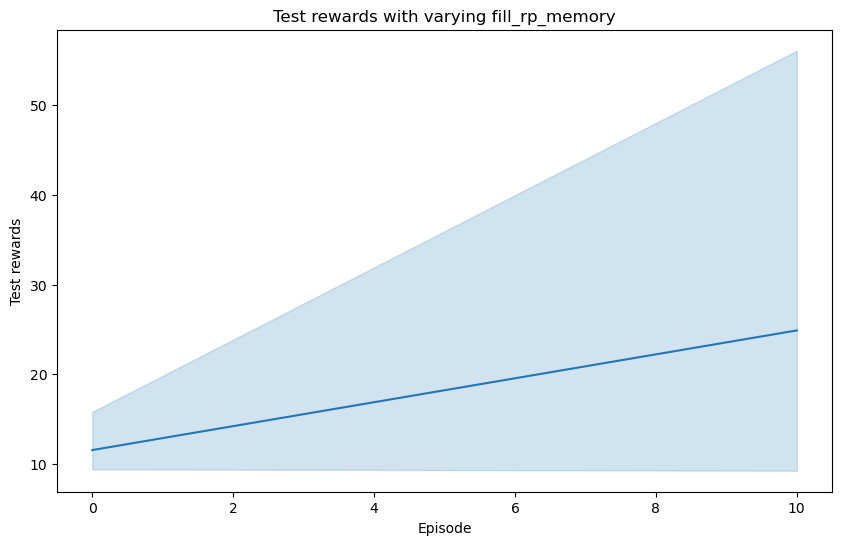

In [7]:
plot_test_rewards(seed_rewards, param_name = hyperparam_to_search, optim_params = optim_params, individual=False)

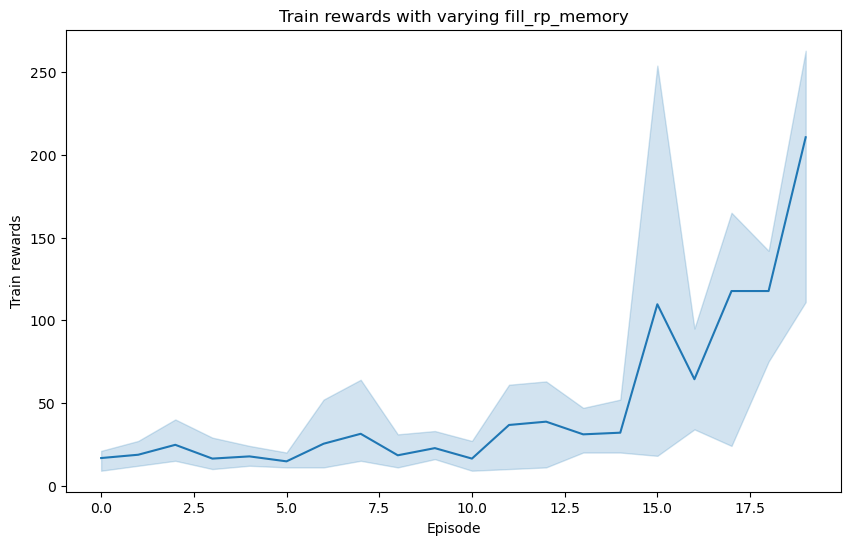

In [8]:
plot_train_rewards(all_episode_rewards, param_name = hyperparam_to_search, optim_params = optim_params, individual=False)